# RGB Classification data set

In [2]:
import zipfile
import tensorflow as tf
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import image_dataset_from_directory
from os import listdir
import shutil
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness, RandomTranslation, Input
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
import random
import numpy as np

2023-12-08 19:39:11.022953: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-08 19:39:11.562274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 19:39:11.562312: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 19:39:11.650834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 19:39:11.826291: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# Check if we have access to GPU
tf.config.list_physical_devices('GPU')

2023-12-08 19:39:21.283147: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-08 19:39:21.614654: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-08 19:39:21.614698: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Becoming one with the data

In [3]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("dogs-vs-cats.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("test1.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("train.zip")
zip_ref.extractall()
zip_ref.close()

In [6]:
# Walktrough 10 percent data directory and list number of files
for filenames in listdir("train"):
  print(filenames)

dog.10876.jpg
cat.1181.jpg
cat.6167.jpg
cat.10918.jpg
dog.855.jpg
cat.1830.jpg
cat.1308.jpg
dog.9236.jpg
dog.9319.jpg
cat.476.jpg
cat.190.jpg
dog.627.jpg
dog.10875.jpg
cat.10463.jpg
cat.10572.jpg
cat.5456.jpg
dog.3395.jpg
dog.9407.jpg
cat.11717.jpg
cat.1003.jpg
cat.5038.jpg
cat.931.jpg
cat.392.jpg
cat.3696.jpg
dog.8983.jpg
cat.3252.jpg
cat.2375.jpg
dog.6243.jpg
dog.11725.jpg
dog.421.jpg
cat.11472.jpg
cat.10155.jpg
cat.9937.jpg
cat.5246.jpg
cat.9001.jpg
cat.7523.jpg
cat.5746.jpg
cat.7024.jpg
dog.6123.jpg
cat.2170.jpg
cat.7968.jpg
cat.1726.jpg
dog.11556.jpg
dog.813.jpg
cat.11801.jpg
cat.2089.jpg
dog.868.jpg
cat.3019.jpg
dog.3666.jpg
dog.7717.jpg
cat.11470.jpg
cat.6428.jpg
dog.8951.jpg
cat.842.jpg
cat.10269.jpg
cat.3872.jpg
cat.322.jpg
cat.8946.jpg
cat.12465.jpg
cat.10188.jpg
cat.5704.jpg
dog.7504.jpg
dog.653.jpg
cat.12257.jpg
dog.11786.jpg
dog.3989.jpg
cat.2040.jpg
cat.10351.jpg
cat.9440.jpg
dog.4813.jpg
dog.8823.jpg
dog.10828.jpg
dog.10661.jpg
cat.6932.jpg
cat.3990.jpg
cat.9142.jpg
cat.

In [7]:
# Walktrough 10 percent data directory and list number of files
for filename in os.walk("test1"):
  print(filename)

('test1', [], ['7645.jpg', '1207.jpg', '3247.jpg', '1496.jpg', '3584.jpg', '5916.jpg', '10315.jpg', '10505.jpg', '2167.jpg', '2333.jpg', '8634.jpg', '5945.jpg', '487.jpg', '11404.jpg', '12205.jpg', '7003.jpg', '12194.jpg', '7734.jpg', '11563.jpg', '8998.jpg', '834.jpg', '7527.jpg', '6982.jpg', '8725.jpg', '3005.jpg', '8091.jpg', '237.jpg', '9568.jpg', '6420.jpg', '10667.jpg', '4488.jpg', '8140.jpg', '5203.jpg', '11965.jpg', '11242.jpg', '5131.jpg', '8171.jpg', '9449.jpg', '1102.jpg', '5001.jpg', '3906.jpg', '11426.jpg', '6881.jpg', '369.jpg', '10130.jpg', '9323.jpg', '3780.jpg', '11663.jpg', '1699.jpg', '9526.jpg', '9744.jpg', '9909.jpg', '3188.jpg', '2114.jpg', '8660.jpg', '9321.jpg', '2473.jpg', '11004.jpg', '6919.jpg', '11668.jpg', '11855.jpg', '4755.jpg', '10222.jpg', '2413.jpg', '9939.jpg', '7402.jpg', '11073.jpg', '2804.jpg', '1295.jpg', '200.jpg', '6861.jpg', '8561.jpg', '8823.jpg', '2208.jpg', '9175.jpg', '4919.jpg', '8068.jpg', '11195.jpg', '2653.jpg', '5840.jpg', '12083.jpg',

In [8]:
def split_images_by_prefix(source_dir, destination_dir_1, destination_dir_2, prefix):
    # Créer les dossiers de destination s'ils n'existent pas déjà
    os.makedirs(destination_dir_1, exist_ok=True)
    os.makedirs(destination_dir_2, exist_ok=True)

    # Parcourir les fichiers du dossier source
    for filename in os.listdir(source_dir):
            source_filepath = os.path.join(source_dir, filename)
            if os.path.isfile(source_filepath):
            # Vérifier si le nom du fichier commence par le préfixe
                if filename.startswith(prefix):
                    destination_filepath = os.path.join(destination_dir_1, filename)
                else:
                    destination_filepath = os.path.join(destination_dir_2, filename)

                # Copier le fichier vers le dossier de destination approprié
                shutil.copyfile(source_filepath, destination_filepath)

In [9]:
split_images_by_prefix("train", "train/cat", "train/dog", "cat")

In [4]:
train_dir = "train"
test_dir = "test1"
input_shape = (224, 224)
batch_size = 32

train_dataset, val_dataset = image_dataset_from_directory(train_dir,
                                                          batch_size=batch_size,
                                                          image_size=input_shape,
                                                          validation_split=0.2,
                                                          subset="both",
                                                          seed=42, 
                                                          label_mode="binary",
                                                          labels="inferred",
                                                          color_mode="rgb")                                                  

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


2023-12-08 19:40:02.611299: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-08 19:40:02.611375: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-08 19:40:02.611391: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-08 19:40:02.759396: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-08 19:40:02.759443: I external/local_xla/xla/stream_executor

In [5]:
plot_losses = PlotLossesKeras()

In [6]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomContrast(0.1),
    RandomBrightness(0.1),
    RandomTranslation(0.1, 0.1),
])

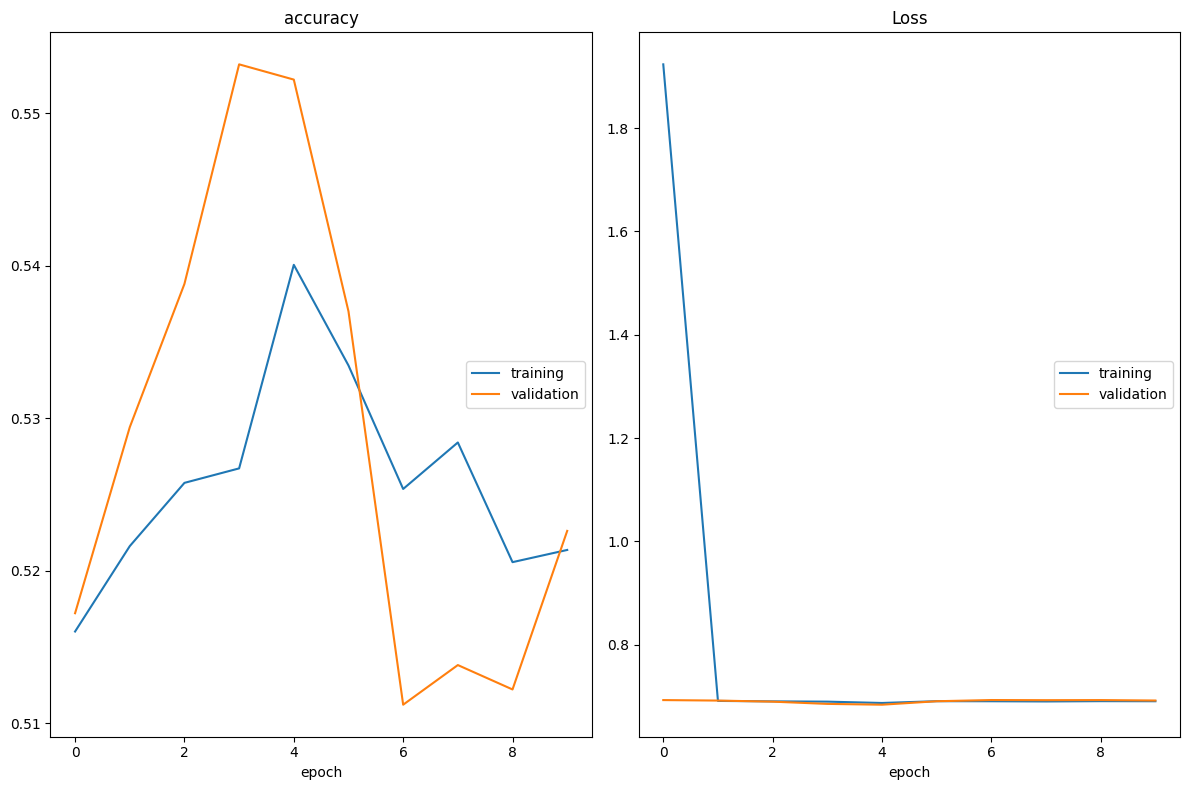

accuracy
	training         	 (min:    0.516, max:    0.540, cur:    0.521)
	validation       	 (min:    0.511, max:    0.553, cur:    0.523)
Loss
	training         	 (min:    0.687, max:    1.924, cur:    0.690)
	validation       	 (min:    0.684, max:    0.693, cur:    0.692)
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5159 - loss: 0.6905 - val_accuracy: 0.5226 - val_loss: 0.6917


In [7]:
model = Sequential([ 
    data_augmentation,
    Conv2D(32, (3, 3), activation="relu", input_shape=input_shape + (3,)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),  
    Dropout(0.2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),  
    Dropout(0.2),
    Flatten(),
    Dense(units=1, activation="sigmoid"),
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

hist = model.fit(train_dataset, 
                 epochs=10, 
                 validation_data=val_dataset,
                 callbacks=[EarlyStopping(patience=10), plot_losses])



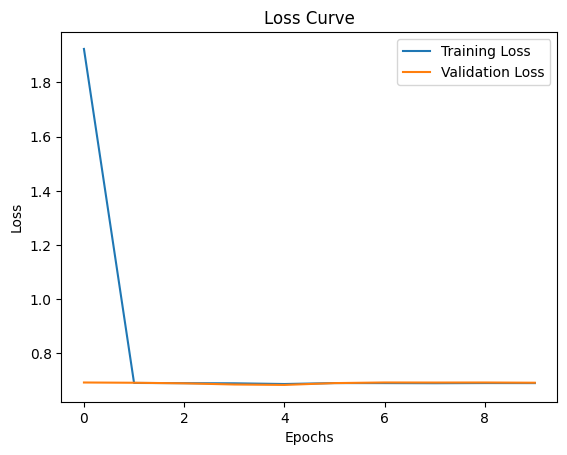

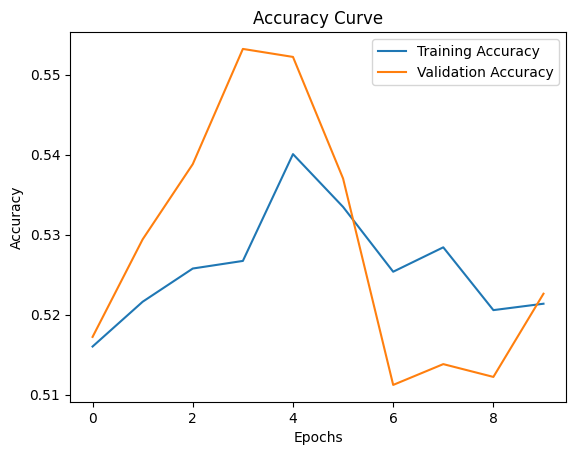

In [8]:
# Plot the loss and accuracy curves

# Plot the loss curve
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)      │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)      │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 43264)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 1)                 │     43,265 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 298,757 (1.14 MB)

 Trainable params: 99,585 (389.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 199,172 (778.02 KB)

In [10]:
# unbach valdataset
labels = []
for image, label in val_dataset.unbatch():
    labels.append(label.numpy())
print(labels)


[array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=f

In [11]:
pred = model.predict(val_dataset)

  1/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [13]:
pred

array([[0.50752914],
       [0.5075063 ],
       [0.50752914],
       ...,
       [0.50752914],
       [0.50752914],
       [0.50752914]], dtype=float32)

In [14]:
report = classification_report(labels, pred.round())

In [15]:
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.05      0.09      2462
         1.0       0.52      0.98      0.68      2538

    accuracy                           0.52      5000
   macro avg       0.62      0.52      0.38      5000
weighted avg       0.62      0.52      0.39      5000



In [16]:
# Count the number of files in each directory
import os

# Specify the directory path
directory = "train"

# Initialize a dictionary to store the count of files in each directory
file_count = {}

# Iterate over the directories
for root, dirs, files in os.walk(directory):
    # Count the number of files in the current directory
    count = len(files)
    
    # Store the count in the dictionary
    file_count[root] = count

# Print the count of files in each directory
for directory, count in file_count.items():
    print(f"{directory}: {count} files")


train: 25000 files
train/dog: 12500 files
train/cat: 12500 files


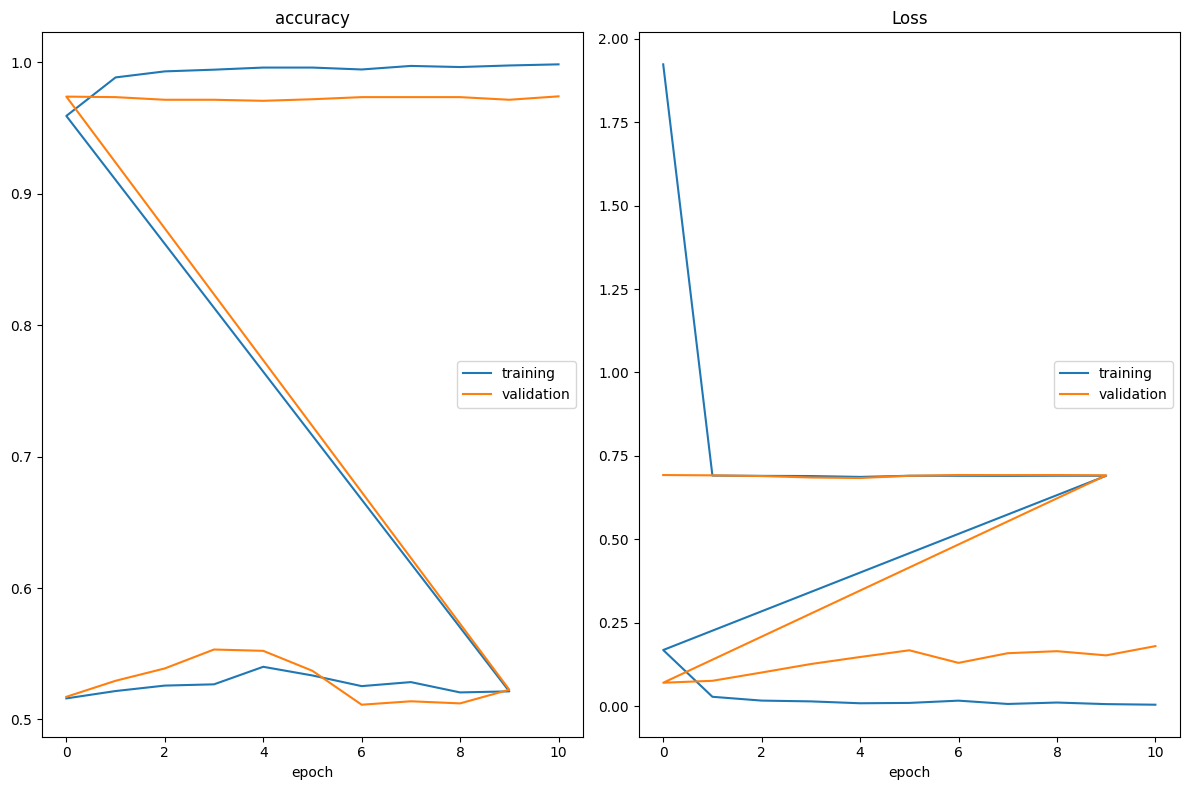

accuracy
	training         	 (min:    0.516, max:    0.999, cur:    0.999)
	validation       	 (min:    0.511, max:    0.974, cur:    0.974)
Loss
	training         	 (min:    0.004, max:    1.924, cur:    0.004)
	validation       	 (min:    0.070, max:    0.693, cur:    0.180)
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9985 - loss: 0.0038 - val_accuracy: 0.9742 - val_loss: 0.1798


In [17]:
# load model
model_trained = VGG16(include_top=False)
 # mark loaded layers as not trainable
for layer in model_trained.layers:
   layer.trainable = False

 # add new classifier layers
inputs = Input(shape=(224, 224, 3))
vgg_output = model_trained(inputs, training=False)
flat1 = Flatten()(vgg_output)
class1 = Dense(32, activation='relu')(flat1)
outputs = Dense(1, activation='sigmoid')(class1)
# define new model
model_custom = Model(inputs=inputs, outputs=outputs)

# compile model
model_custom.compile(optimizer='adam', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

# fit model
hist = model_custom.fit(train_dataset,
                         epochs=20,
                         validation_data=val_dataset,
                         callbacks=[EarlyStopping(patience=10), plot_losses])

In [18]:
# summarize
model_custom.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)         │ 14,714,688 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 32)                │    802,848 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 17,123,333 (65.32 MB)

 Trainable params: 802,881 (3.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,605,764 (6.13 MB)

In [19]:
pred = model_custom.predict(val_dataset)

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step


In [20]:
labels

[array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], d

In [21]:
report = classification_report(labels, pred.round())
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2462
         1.0       0.97      0.98      0.97      2538

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [22]:
# unbach valdataset
labels = []
images = []
for image, label in val_dataset.unbatch():
    labels.append(label.numpy())
    images.append(image.numpy())

In [23]:
classes = ["cat", "dog"]

In [24]:
def plot_images(images, pred, labels=None):
    plt.figure(figsize=(23, 12))
    random_number = random.randint(0, len(labels))
    if labels is not None:
        for index, (image, prediction, label) in enumerate(zip(images[random_number:random_number+15], pred[random_number:random_number+15], labels[random_number:random_number+15])):
            plt.subplot(3, 5, index+1)
            plt.imshow(image/255.)
            plt.title(f"Predicted: {classes[int(prediction)]}\nTrue: {classes[int(label)]}") 
            plt.axis("off")
    else:
        for index, (image, prediction) in enumerate(zip(images[random_number:random_number+15], pred[random_number:random_number+15])):
            plt.subplot(3, 5, index+1)
            plt.imshow(image/255.)
            plt.title(f"Predicted: {classes[int(prediction)]}")
            plt.axis("off")

/tmp/ipykernel_31087/1394315089.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {classes[int(prediction)]}\nTrue: {classes[int(label)]}")


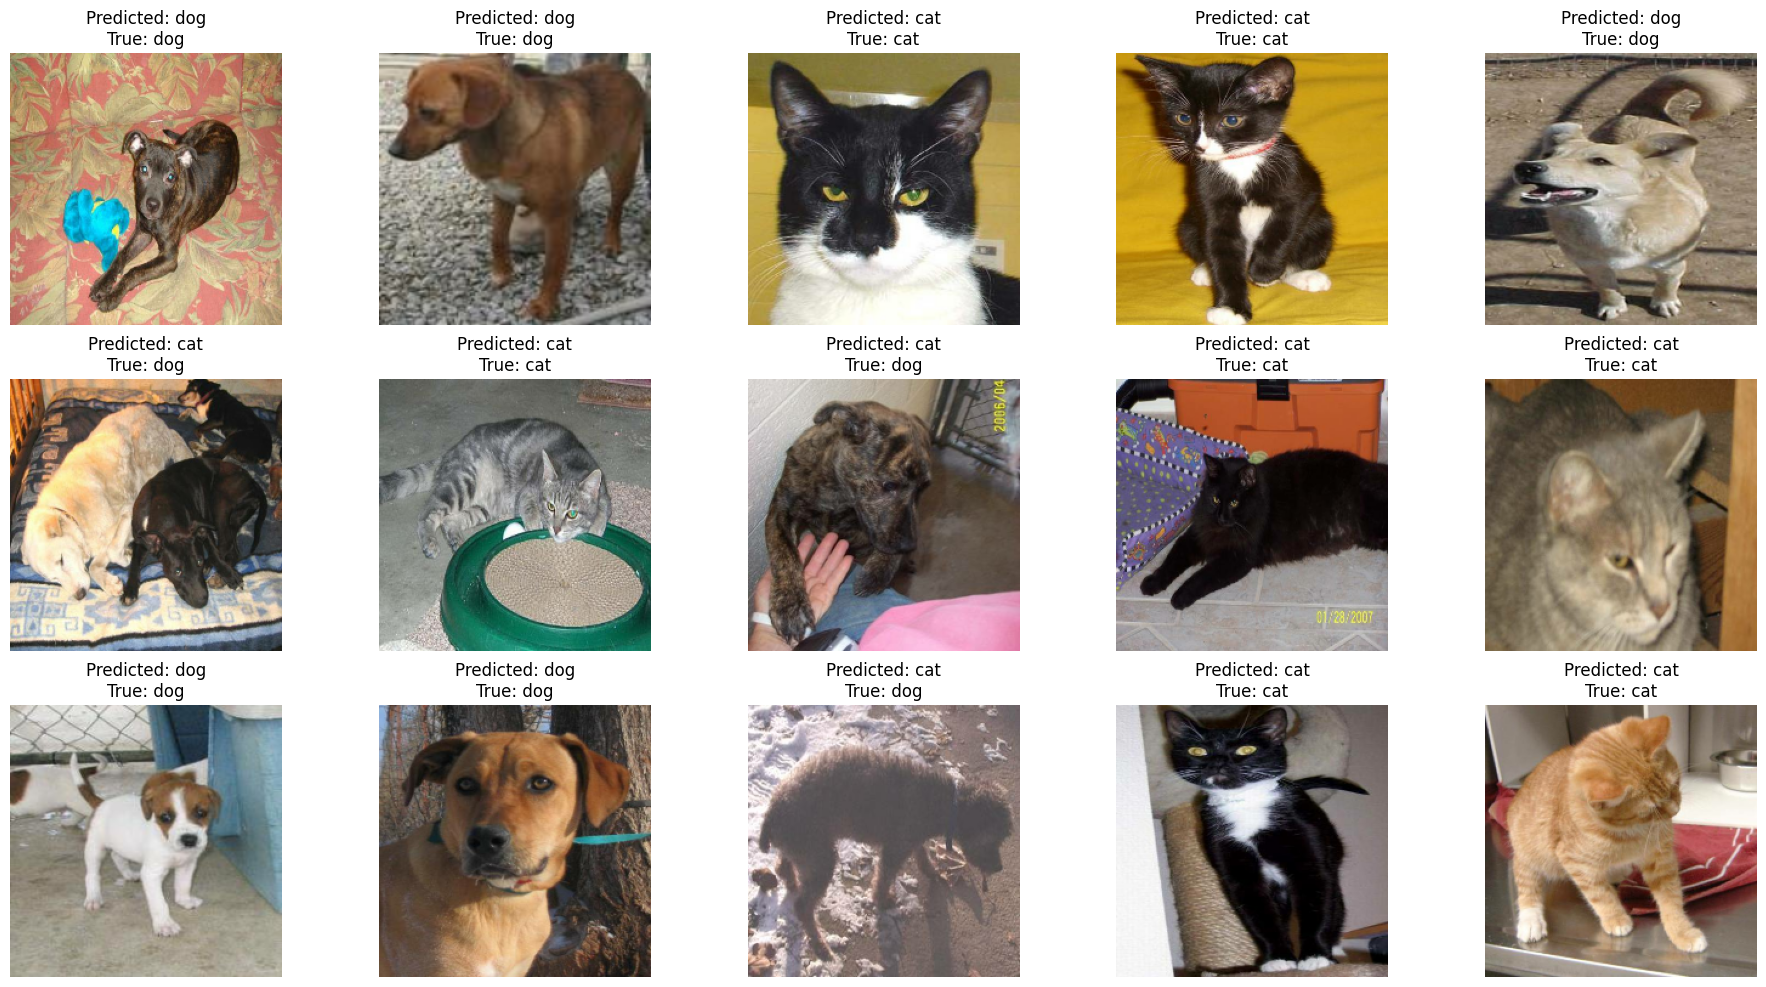

In [25]:
plot_images(images, pred, labels)

In [26]:
images_test = []
# Create test dataset
for test_filename in os.listdir("test1"):
    test_path = os.path.join("test1", test_filename)
    test_image = load_img(test_path, target_size=(224, 224))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.
    images_test.append(test_image)

In [27]:
pred_test = model_custom.predict(images_test)

In [ ]:
plot_images(images_test, pred_test)